In [20]:
%load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline
import reinforcement_expm
import numpy as np
import tensorflow as tf
from agents import load_expm_params
import copy
from IPython.display import clear_output
import os
# from IPython.core.debugger import set_trace; set_trace()

def episode_finished_callback(runner,persistent_to_print = []):
    if runner.episodes % 20 == 0:
        clear_output(wait=True)
        for ptp in persistent_to_print:
            print(ptp)
        print('Average reward at episode %d : %d' % (runner.episodes,np.mean(runner.episode_rewards[-100:])))
        print('Avg sample time is %f (ms)' % (1000*runner.avg_sample_time))
        print('Avg train time is %f (ms)' % ((runner.global_trains/runner.global_t)*(1000*runner.avg_train_time)))
        
        if len(runner.current_episode_losses):
            plt.figure(figsize=[13,3])
        
            num_losses = np.shape(runner.episode_average_losses)[1]

            ax1 = plt.subplot2grid((1,num_losses+2), (0, 0), colspan=2)
            plt.plot(runner.episode_rewards)
            plt.xlabel('Episode')
            plt.ylabel('Rewards')
        
            for i in range(num_losses):
                ax = plt.subplot2grid((1,num_losses+2), (0, 2 + i))
                plt.plot(runner.episode_average_losses[:,i])
                plt.xlabel('Episode')
                plt.ylabel('Losses')
        plt.show()
        plt.close()
        
        
        
# reinforcement_expm.clear_logs() # Do some housekeeping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Average reward at episode 40 : -112
Avg sample time is 1.112168 (ms)
Avg train time is 1.626638 (ms)


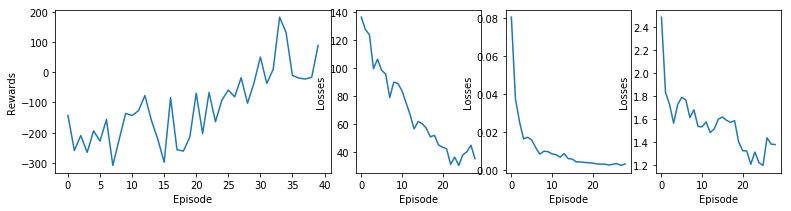

In [ ]:
algorithm = 'TDM'
expm_name = 'LunarLander'
runner = reinforcement_expm.run_expm(algorithm,expm_name,episode_finished_callback=episode_finished_callback)

In [36]:
# algorithm = 'DQN'
# expm_name = 'LunarLander'
# # model_path = '/tmp/tensorflow/logs/reinforcement_learning/DQN/LunarLander/20180809_162357'
# model_path = '/tmp/tensorflow/logs/reinforcement_learning/DQN/LunarLander/20180817_150754'
# runner = reinforcement_expm.setup_expm(algorithm,expm_name,restore_model_path = model_path)
runner.test(render=True,optimal_action=False)


Episode reward is -3


Testing 1
{'env_name': 'CartPole-v1', 'agent_params': {'lr': 0.001, 'tau': 0.01, 'discount': 0.99, 'max_td': 3, 'double': False, 'soft_learning': False, 'huber_loss': False, 'clip_gradients': 3.0, 'train_steps_per_t': 1, 'q_train_steps_per_t': 3, 'reward_scale': 3.0, 'multi_step': False}, 'policy_params': {'action_choice': 'Boltzmann'}, 'replay_buffer_params': {'batch_size': 64, 'max_size': 10000, 'min_pool_size': 1000}, 'runner_params': {'max_episodes': 400, 'max_episode_length': 300}, 'network_spec': [{'type': 'dense', 'size': 50}, {'type': 'dense', 'size': 50}]}
Average reward at episode 180 : 151
Avg sample time is 0.385143 (ms)
Avg train time is 4.198962 (ms)


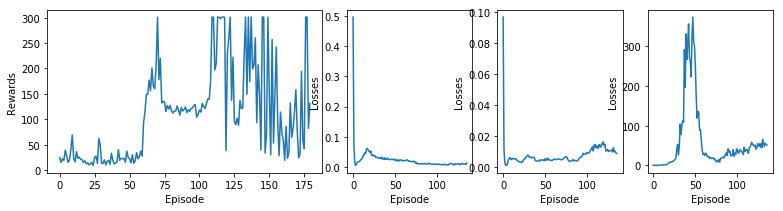

Keyboard interupt detected
Finished experiment, logged in: /tmp/tensorflow/logs/reinforcement_learning/TDM_CartPole_20180820_115310


ValueError: cannot copy sequence with size 199 to array axis with dimension 400

In [6]:
algorithm = 'TDM'
expm_name = 'CartPole'

test_case_params = {
    '1' : dict(agent_params = dict(multi_step = False)),
    '3' : dict(agent_params = dict(multi_step = 3)),
    '10' : dict(agent_params = dict(multi_step = 10)),
    }

    
rewards = reinforcement_expm.sweep_test_cases(algorithm,expm_name,test_case_params,runs_per_point = 3,episode_finished_callback=episode_finished_callback)

   